In [3634]:
import glob 
import os 
import cv2 
import numpy as np 
import open3d as o3d
import re 
import matplotlib.pyplot as plt


In [3635]:
pcd_path = 'CV-A2-calibration\lidar_scans'
camera_param = 'CV-A2-calibration\camera_parameters'
camera_img = 'CV-A2-calibration\camera_images'

In [3636]:
pcd_files = os.listdir(pcd_path)
camera_param_files = os.listdir(camera_param)
images_files = os.listdir(camera_img)

In [3637]:
def compute_plane_normals_and_offsets(points):
    centroids = np.mean(points, axis=0)

    # point_T = np.transpose(points)

    centered_points = points - centroids 

    # centered_points_T = np.transpose(centered_points)

    u , s , v = np.linalg.svd(centered_points)

    normal = v[-1,:]
    normal = normal/np.linalg.norm(normal)

    
    offset = np.dot(normal, centroids)

    if(offset < 0) : 
        offset = -1*offset
        normal = -1*normal 


    return normal, offset

In [3638]:
store_pcd_points = []

In [3639]:
lidar_param = 'CV-A2-calibration\lidar_parameters'

In [3640]:
for file in pcd_files : 
    name = re.split('[.]',file)
    pth = os.path.join(pcd_path,file)
    pcd = o3d.io.read_point_cloud(pth)
    # o3d.visualization.draw_geometries([pcd])

    new_dir = os.path.join(lidar_param,name[0])
    os.makedirs(new_dir,exist_ok=True)

    points = np.asarray(pcd.points)
    normal, offset = compute_plane_normals_and_offsets(points)

    store_pcd_points.append(points)

    normal_file = os.path.join(new_dir,'normal.txt')
    np.savetxt(normal_file,normal)


    with open(os.path.join(new_dir,'offset.txt'),'w') as f : 
        f.write(str(offset))


In [3641]:
'''
alpha_c = -np.dot(camera_normal,translation_camera)

alpha_l = -np.dot(lidar_normal,translation_lidar)
'''

'\nalpha_c = -np.dot(camera_normal,translation_camera)\n\nalpha_l = -np.dot(lidar_normal,translation_lidar)\n'

In [3642]:
alpha_c = []
alpha_l = []

In [3643]:
theta_c = []
theta_l = []

In [3644]:
theta_c

[]

In [3645]:
traversal_order = []

In [3646]:
for file in camera_param_files : 
    if file[-5:] == ".jpeg":
        traversal_order.append(file)
        f1 = os.path.join(file,'camera_normals.txt')
        camera_normal_pth = os.path.join(camera_param,f1)
        
        with open(camera_normal_pth, "r") as fl:
                    # Read lines from the file
                    lines = fl.readlines()

                    # Initialize an empty list to store the values
                    n_c = []

                    # Iterate over each line
                    for line in lines:
                        # Convert the line to a floating-point number and append to the list
                        val = float(line.strip())
                        # if val < 0 : 
                        #     val = val
                        n_c.append(val)

        # nc = [-1*x for x in n_c] 

        # saving camera normals in a list 
        


        ft = os.path.join(file,'translation_vectors.txt')
        camera_translation_pth = os.path.join(camera_param,ft)

        with open(camera_translation_pth, "r") as fl:
                    # Read lines from the file
                    lines = fl.readlines()

                    # Initialize an empty list to store the values
                    values_tr = []

                    # Iterate over each line
                    for line in lines:
                        # Convert the line to a floating-point number and append to the list
                        values_tr.append(float(line.strip()))
                        

        a_c = [np.dot(n_c,values_tr)]

        print('a_c',a_c)
        

        if( a_c[0] < 0 ) : 
            a_c[0] = -1*a_c[0] 
            n_c = [-1*x for x in n_c]



        # saving alpha_c_i in list 
        alpha_c.append(a_c)

        theta_c.append(n_c)

        # print(values_tr)

        f2 = os.path.join(file[:-5],'offset.txt')
        lidar_offset_pth = os.path.join(lidar_param,f2)
        with open(lidar_offset_pth, "r") as fl:
            # Read lines from the file
            lines = fl.readlines()

            # Initialize an empty list to store the values
            values_l = []

            # Iterate over each line
            for line in lines:
                # Convert the line to a floating-point number and append to the list
                values_l.append(float(line.strip()))

        # print(values_l)

        a_l = values_l

        # saving alpha_l_i in list
        alpha_l.append(a_l)


        f3 = os.path.join(file[:-5],'normal.txt') 
        lidar_normal_pth = os.path.join(lidar_param,f3)
        with open(lidar_normal_pth,'r') as fl : 
              lines = fl.readlines()

              n_l = []

              for line in lines : 
                    n_l.append(float(line.strip()))


        # saving lidar normals in a lsit 
        theta_l.append(n_l)



a_c [-4.677955060890372]
a_c [-4.368594700224934]
a_c [-4.785748982586067]
a_c [-4.343273183570689]
a_c [-4.727368454967049]
a_c [-5.205498545083515]
a_c [-5.803273451203123]
a_c [-5.771990380645411]
a_c [-5.256995334633229]
a_c [-5.281393198347555]
a_c [-4.824383661803292]
a_c [-4.657652052461787]
a_c [-4.827808943328168]
a_c [-5.779199115643299]
a_c [-5.292352438609255]
a_c [-7.611380101911543]
a_c [-7.009944964286768]
a_c [-7.404512403822031]
a_c [-8.949836727011691]
a_c [-9.585963384863087]
a_c [-7.449016977562471]
a_c [-8.00874140925152]
a_c [-6.621484435177831]
a_c [-6.252637544474237]
a_c [-6.546204640260261]
a_c [-6.271682486625628]
a_c [-4.2435333217039855]
a_c [-3.2669594619812075]
a_c [-3.477541361372397]
a_c [-6.887423542264781]
a_c [-5.512327311778965]
a_c [-5.407026891925784]
a_c [-5.625081587036372]
a_c [-6.6840218125586]
a_c [-7.815800547528533]
a_c [-8.224076199102935]
a_c [-7.327057504004722]
a_c [-6.036200512377853]


In [3647]:
theta_c

[[0.6437172128404278, -0.07551619148908961, 0.7615283676370401],
 [0.5704655219339347, -0.10565078948522882, 0.8144980042736699],
 [0.0527596191570128, -0.22970552281699977, 0.9718290978221306],
 [0.5591768659084388, 0.07439273018838757, 0.8257039144438723],
 [0.4000883470314932, -0.006876342621640857, 0.9164507790829561],
 [0.189545745784405, -0.13129914964229497, 0.9730534124899022],
 [-0.3483515060253868, -0.2551769297581715, 0.9019622845601903],
 [-0.6578938816057525, 0.2854277743879179, 0.6969265572165237],
 [0.06913268140151134, -0.23786099021453455, 0.9688358073979297],
 [-0.007398641926756669, -0.25390736304317185, 0.9672002435329008],
 [0.6547740051525707, -0.16482199867504083, 0.7376345375111079],
 [0.4240294083103121, -0.31924201301641786, 0.8475161343675006],
 [0.6868293295112492, 0.43663578530949004, 0.5810461798431282],
 [0.7387513320897402, 0.10276551732567946, 0.6660973786049753],
 [0.7956910010710261, -0.24197358708072597, 0.5552698568893097],
 [0.06925355724436423, 0.

In [3648]:
alpha_c

[[4.677955060890372],
 [4.368594700224934],
 [4.785748982586067],
 [4.343273183570689],
 [4.727368454967049],
 [5.205498545083515],
 [5.803273451203123],
 [5.771990380645411],
 [5.256995334633229],
 [5.281393198347555],
 [4.824383661803292],
 [4.657652052461787],
 [4.827808943328168],
 [5.779199115643299],
 [5.292352438609255],
 [7.611380101911543],
 [7.009944964286768],
 [7.404512403822031],
 [8.949836727011691],
 [9.585963384863087],
 [7.449016977562471],
 [8.00874140925152],
 [6.621484435177831],
 [6.252637544474237],
 [6.546204640260261],
 [6.271682486625628],
 [4.2435333217039855],
 [3.2669594619812075],
 [3.477541361372397],
 [6.887423542264781],
 [5.512327311778965],
 [5.407026891925784],
 [5.625081587036372],
 [6.6840218125586],
 [7.815800547528533],
 [8.224076199102935],
 [7.327057504004722],
 [6.036200512377853]]

In [3649]:
np.array(theta_l).shape

(38, 3)

In [3650]:
def lidar_translation_matrix(theta_c , alpha_c , alpha_l) : 
    theta_c = np.array(theta_c)
    alpha_c = np.array(alpha_c)
    alpha_l = np.array(alpha_l)
    

    theta = np.linalg.inv(theta_c.T @ theta_c)

    # print(theta.shape)

    # t1 = np.dot(np.dot(theta , theta_c.T) , (alpha_c-alpha_l))
    
    t1 = theta @ theta_c.T @ (alpha_c - alpha_l)

    return t1 
    

In [3651]:
t1 = lidar_translation_matrix(theta_c,alpha_c,alpha_l)

In [3652]:
t1.shape

(3, 1)

In [3653]:
t1

array([[ 0.08855656],
       [-0.36208144],
       [-0.59925671]])

In [3654]:
def rotation_matrix(theta_l,theta_c) : 
    theta_l = np.array(theta_l)
    theta_c = np.array(theta_c) 

    # print(theta_l.shape)
    # print(theta_c.shape)

    theta = theta_l.T @ theta_c

    # theta = theta_l @ theta_c.T

    # print(theta.shape)

    U , _, V_t = np.linalg.svd(theta)

    # print(V_t.shape)
    # print(U.shape)

    # R1 = np.dot(V_t.T , U.T)

    R1 = V_t.T @ U.T

    return U, V_t, R1 

In [3655]:
U, V_t , R1 = rotation_matrix(theta_l , theta_c)

In [3656]:
R1.shape

(3, 3)

In [3657]:
R1

array([[-1.75158876e-01, -9.84540172e-01,  1.36164316e-04],
       [ 1.53559935e-02, -2.87025999e-03, -9.99877970e-01],
       [ 9.84420419e-01, -1.75135410e-01,  1.56213440e-02]])

In [3658]:
print(np.linalg.det(R1))

0.999999999999999


In [3659]:
def estimate_transformation(U,V_t,R1,t1) : 
    # if np.linalg.det(R1) < 0 : 
    #     V_t[2,:] *= -1 
    #     R1 = np.dot(V_t.T, U.T)

    print(f"det(R1) = {np.linalg.det(R1)}")

    # print(R1.shape)
    # print(t1.shape)

    Ct_l = np.hstack((R1,t1))

    Ct_l = np.vstack((Ct_l, [0,0,0,1]))

    return Ct_l


In [3660]:
Ct_l = estimate_transformation(U,V_t,R1,t1)
print(Ct_l.shape)
print(Ct_l)

det(R1) = 0.999999999999999
(4, 4)
[[-1.75158876e-01 -9.84540172e-01  1.36164316e-04  8.85565624e-02]
 [ 1.53559935e-02 -2.87025999e-03 -9.99877970e-01 -3.62081439e-01]
 [ 9.84420419e-01 -1.75135410e-01  1.56213440e-02 -5.99256711e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [3661]:
camera_camera_matrix_pth = 'CV-A2-calibration\camera_parameters\camera_intrinsic.txt'

# Initialize a 3x3 camera_matrix
camera_matrix = []

with open(camera_camera_matrix_pth, 'r') as fl:
    lines = fl.readlines()

    # Iterate over each line
    for line in lines:
        # Split the line into individual values and convert to floats
        line_values = [float(val) for val in line.strip().split()]
        # Append the row to the camera_matrix
        camera_matrix.append(line_values)

print(camera_matrix)


[[635.3664855742439, 0.0, 643.3965876009681], [0.0, 626.1901730718113, 388.0747880982143], [0.0, 0.0, 1.0]]


In [3662]:
camera_matrix = np.array(camera_matrix)

In [3663]:
camera_camera_matrix_pth = 'CV-A2-calibration\camera_parameters\distortion.txt'

# Initialize a 3x3 camera_matrix
distortion = []

with open(camera_camera_matrix_pth, 'r') as fl:
    lines = fl.readlines()

    # Iterate over each line
    for line in lines:
        # Split the line into individual values and convert to floats
        line_values = [float(val) for val in line.strip().split()]
        # Append the row to the camera_matrix
        distortion.append(line_values)

print(distortion)


[[-0.08680180305386757, 0.11562873770584488, 0.007226010587794677, -0.00022335371972260793, -0.05891062411595049]]


In [3664]:
distortion = np.array(distortion[0])

In [3665]:
def transform_lidar_to_camera(lidar_points, CtL):

    # Add homogeneous coordinate to LIDAR points
    lidar_points_homogeneous = np.hstack((lidar_points, np.ones((len(lidar_points), 1))))
    # lidar_points_homogeneous = np.hstack((lidar_points, np.ones((len(lidar_points[0]), 1))))

    print("Shape of lidar_points_homogeneous:", lidar_points_homogeneous.shape)
    print("Shape of CtL:", CtL.shape)

    # Map LIDAR points to camera frame
    camera_points_homogeneous = np.dot(CtL, lidar_points_homogeneous.T).T

    # Debugging: Print shape of resulting homogeneous points
    print("Shape of camera_points_homogeneous:", camera_points_homogeneous.shape)

    # Convert points to non-homogeneous coordinates
    camera_points = camera_points_homogeneous[:, :3] / camera_points_homogeneous[:, 3][:, None]


    return camera_points


In [3666]:

def project_to_image_plane(camera_points, camera_matrix, distortion_coeffs):

    camera_matrix = camera_matrix

    distorted_points, _ = cv2.projectPoints(camera_points, np.zeros((3,)), np.zeros((3,)), camera_matrix, distortion_coeffs)

    # Reshape projected points
    projected_points = distorted_points.squeeze()

    return projected_points



In [3667]:
def draw_projected_points(image, projected_points):
    image_with_points = np.copy(image)

    # Convert projected points to integer coordinates
    # print(projected_points)
    projected_points_int = np.round(projected_points).astype(int)

    # Draw circles or dots at projected points
    for point in projected_points_int:
        cv2.circle(image_with_points, tuple(point), radius=3, color=(0, 255, 0), thickness=-1)  # Green color, filled circle

    return image_with_points


In [3668]:
for image in images_files : 
    lidar_scan_pth = os.path.join(pcd_path,f'{image[:-5]}.pcd')
    image_path = os.path.join(camera_img,image)

    img_pcd =  o3d.io.read_point_cloud(lidar_scan_pth)
    img_pcd_points = np.asarray(img_pcd.points)

    img_camera_points = transform_lidar_to_camera(img_pcd_points , Ct_l)

    img_projected_points = project_to_image_plane(img_camera_points,camera_matrix,distortion)

    save_pth = os.path.join('CV-A2-calibration\point_projected_images_final',image)

    i = cv2.imread(image_path)
    i_with_points = draw_projected_points(i,img_projected_points)

    cv2.imwrite(save_pth,i_with_points)




Shape of lidar_points_homogeneous: (230, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (230, 4)
Shape of lidar_points_homogeneous: (153, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (153, 4)
Shape of lidar_points_homogeneous: (116, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (116, 4)
Shape of lidar_points_homogeneous: (143, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (143, 4)
Shape of lidar_points_homogeneous: (107, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (107, 4)
Shape of lidar_points_homogeneous: (91, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (91, 4)
Shape of lidar_points_homogeneous: (93, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (93, 4)
Shape of lidar_points_homogeneous: (92, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (92, 4)
Shape of lidar_points_homogeneous: (104, 4)
Shape of CtL: (4, 4)
Shape of camera_points_homogeneous: (104, 4)
Shape of lidar_p

In [3669]:
def compute_cosine_distance(R1, n_l, n_c ):
    """
    Compute the cosine distance between camera normal and transformed LIDAR normal.

    Parameters:
        n_c (numpy array): Camera normal vector (shape: (3, 1)).
        n_l_transformed (numpy array): Transformed LIDAR normal vector (shape: (3, 1)).

    Returns:
        cosine_distance (float): Cosine distance between the two normal vectors.
    """

    n_l = np.array(n_l)
    n_c = np.array(n_c)

    n_l_transformed = R1 @ n_l.T

    # Compute dot product of normalized vectors
    dot_product = np.dot(n_c, n_l_transformed)

    # Compute magnitudes of vectors
    magnitude_n_c = np.linalg.norm(n_c)
    magnitude_n_l_transformed = np.linalg.norm(n_l_transformed)

    # Compute cosine distance
    cosine_distance = dot_product / (magnitude_n_c * magnitude_n_l_transformed)

    return cosine_distance



In [3670]:
R1.shape

(3, 3)

In [3671]:
np.array(theta_l).shape

(38, 3)

In [3672]:
len(theta_l)

38

In [3673]:
cosine_distance = []

In [3674]:
for i in range(len(theta_l)) :
    n_l = theta_l[i]
    n_c = theta_c[i] 
    cd = compute_cosine_distance(R1,n_l,n_c)

    cosine_distance.append(cd)

In [3675]:
print(len(cosine_distance))

38


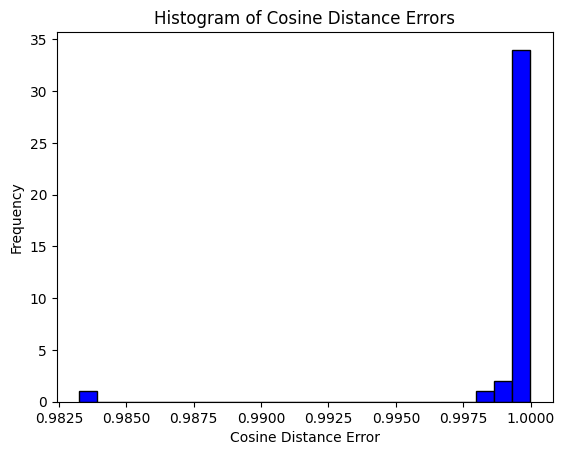

In [3676]:
import matplotlib.pyplot as plt

# Assuming c_d is a list or numpy array containing the cosine distance errors for all pairs


# Plot histogram of cosine distance errors
plt.hist(cosine_distance, bins=25, color='blue', edgecolor='black')
plt.xlabel('Cosine Distance Error')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Distance Errors')
plt.show()


In [3677]:
avg_error = np.mean(np.array(cosine_distance))

standard_deviation = np.std(np.array(cosine_distance))

print("Average error:", avg_error)
print("Standard deviation:", standard_deviation)


Average error: 0.9993530978365598
Standard deviation: 0.002661000072088747


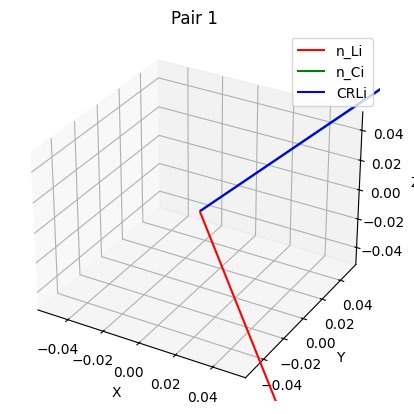

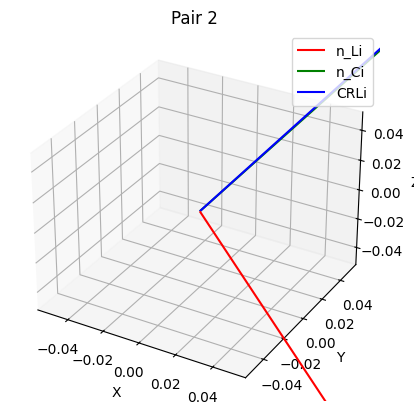

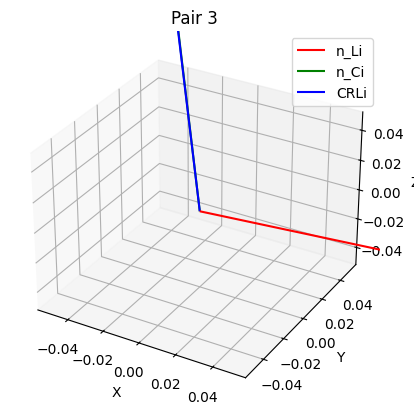

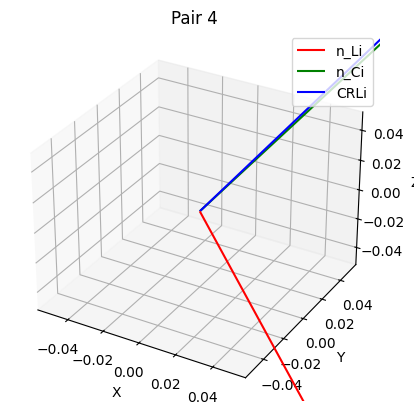

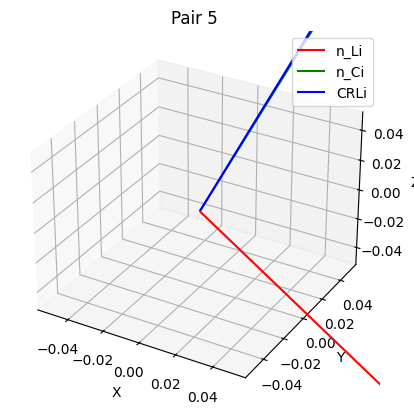

In [3678]:
# Plot normal vectors for 5 pairs
for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Original LIDAR normal vector
    n_Li = theta_l[i]
    ax.quiver(0, 0, 0, n_Li[0], n_Li[1], n_Li[2], color='r', label='n_Li')

    # Camera normal vector
    n_Ci = theta_c[i]
    ax.quiver(0, 0, 0, n_Ci[0], n_Ci[1], n_Ci[2], color='g', label='n_Ci')

    # Transformed LIDAR normal vector
    n_li = np.array(n_Li)
    n_ci = np.array(n_Ci)

    n_li_transformed = R1 @ n_li.T

    
    n_CRLi = n_li_transformed
    ax.quiver(0, 0, 0, n_CRLi[0], n_CRLi[1], n_CRLi[2], color='b', label='CRLi')

    # Set plot labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Set title for the plot
    ax.set_title(f"Pair {i+1}")

# Show plot
plt.show()
